In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pygame

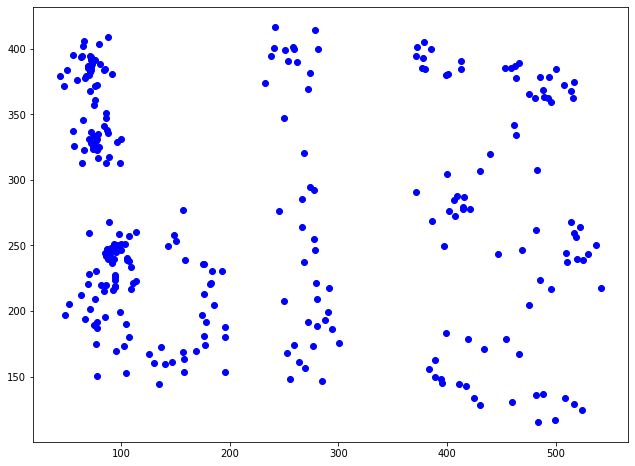

In [14]:
points = np.empty((0,2), dtype='f')
    
c_radius = 2
c_color = (0,255,255)
c_thickness = 0 
jet_radius = 30
jet_thr = 0

bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))

is_running = True
is_pushing = False
while is_running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            is_running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            is_pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            is_pushing = False
            
    if is_pushing and np.random.uniform(0,1)>jet_thr:        
        (x, y) = pygame.mouse.get_pos()
        r = np.random.uniform(0,jet_radius)
        phi = np.random.uniform(0,2*np.pi)
        coord = [x+r*np.cos(phi), height-y+r*np.sin(phi)]
        points = np.append(points, [coord], axis=0)
            
    screen.fill(bg_color)
    for point in points:
        pygame.draw.circle(screen,c_color,(int(point[0]),height-int(point[1])),c_radius,c_thickness)
    pygame.display.flip()
    
pygame.quit()

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points[:,0],points[:,1],c="blue")
plt.show()

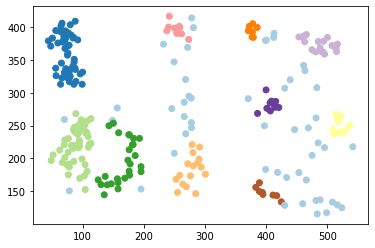

In [15]:
from sklearn.cluster import DBSCAN
labels = DBSCAN(eps=20, min_samples=5).fit_predict(points)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(points[:,0], points[:,1], c=labels, cmap=plt.cm.Paired)
plt.show()

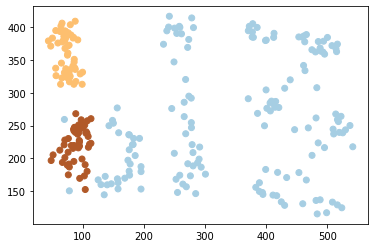

In [16]:
class DB_SCAN():
    def __init__(self, dataset, eps=20., min_samples=10):
        self.dataset = dataset
        self.eps = eps
        self.min_samples = min_samples
        self.n_clusters = 0
        self.clusters = {0:[]}
        self.visited = set()
        self.labels = np.array([], dtype='i')
        self.fitted = False
        
    def get_dist(self, list1, list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
    
    def fit(self):
        for P in self.dataset:
            P = list(P)
            if tuple(P) in self.visited:
                continue
            self.visited.add(tuple(P))
            neighbours = self.get_neighbours(P)
            if len(neighbours) < self.min_samples:
                self.clusters[0].append(P)
            else:
                self.expand_cluster(P)
        self.fitted = True
        
    def get_neighbours(self, P):
        return [list(Q) for Q in self.dataset if self.get_dist(Q,P) < self.eps]
    
    def expand_cluster(self, P):
        self.n_clusters += 1
        self.clusters[self.n_clusters] = [P]
        neighbours = self.get_neighbours(P)
        while neighbours:
            n = neighbours.pop()
            if tuple(n) in self.visited:
                continue
            self.visited.add(tuple(n))
            self.clusters[self.n_clusters].append(n)
            neighbours.extend(self.get_neighbours(n))
            if n in self.clusters[0]:
                self.clusters[0].remove(n)
                
    def get_labels(self):
        if not self.fitted:
            self.fit()        
        labels = []
        for p in self.dataset:
            for i in range(self.n_clusters+1):
                if list(p) in self.clusters[i]:
                    labels.append(i)
                    break
        self.labels = np.array(labels, dtype='i')
        return self.labels
    
dbscan = DB_SCAN(points, eps=20, min_samples=10)

labels = dbscan.get_labels()
plt.figure()
plt.scatter(points[:,0], points[:,1], c=labels, cmap=plt.cm.Paired)
plt.show()

## Домашнее задание

In [17]:
from math import hypot
l = points.tolist()
m = 3
distances = []
averages = []
sum_avgs = 0

for i in range(0, len(l)):
    for j in range(0, len(l)):
        if i != j:
            st = hypot(l[i][0] - l[j][0], l[i][1] - l[j][1])
            distances.append(st)   
    distances.sort()
    for k in range(0, m):
        sum_avgs = sum_avgs + distances[k]   
    sum_avgs = sum_avgs / m
    averages.append(sum_avgs)
    sum_avgs = 0
    distances = []   
averages.sort()

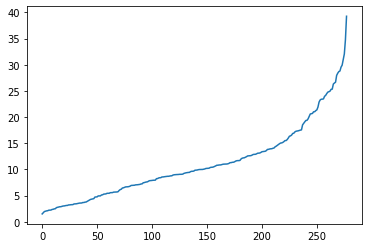

In [18]:
plt.figure()
plt.plot(averages)
plt.show()

In [19]:
print(averages)

[1.4998918457112982, 1.7339584505297323, 1.9478133945823555, 2.0152305744043644, 2.08020698887413, 2.1088685181482254, 2.2085913695741968, 2.2252379883433355, 2.2358976655370433, 2.351222653361708, 2.3826370428224632, 2.4633742235573695, 2.494913640789296, 2.705136577423692, 2.7610631479774614, 2.8060066479975876, 2.8682092772350707, 2.8794058816177706, 2.944882658707133, 3.0083545514684666, 3.022619086106778, 3.075889879226986, 3.115501062722918, 3.121139058922193, 3.2139294814984987, 3.2233332586002366, 3.254653586300383, 3.256387186664883, 3.2792745946240633, 3.4040871710046896, 3.409922625655271, 3.4302119939737903, 3.482057145086898, 3.5289172954308037, 3.5662091794138036, 3.586279720343791, 3.587379794314607, 3.6783399669563424, 3.6791176798738245, 3.749203732071321, 3.7726115121589436, 3.8884310539779996, 3.984878812234004, 4.142327769707937, 4.2672695120200865, 4.313150088852429, 4.347756799789404, 4.421357089367159, 4.718754958229587, 4.74059725965197, 4.758264403409775, 4.936

In [20]:
def clusterize(eps):
  lables = DBSCAN(eps, min_samples=3).fit_predict(points)
  plt.figure()
  plt.scatter(points[:,0], points[:,1], c=lables, cmap=plt.cm.Paired)
  plt.show()
  print(f'Clusterize with eps = {eps}')

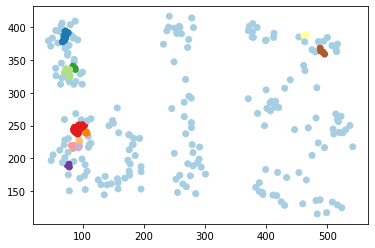

Clusterize with eps = 5


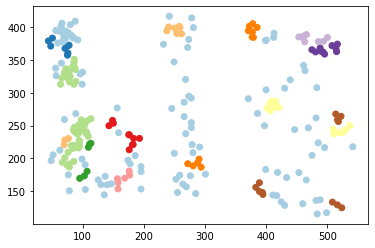

Clusterize with eps = 10


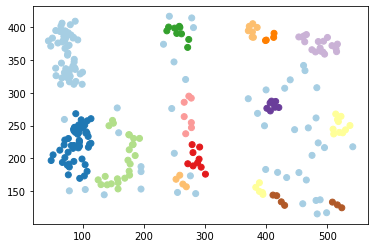

Clusterize with eps = 15


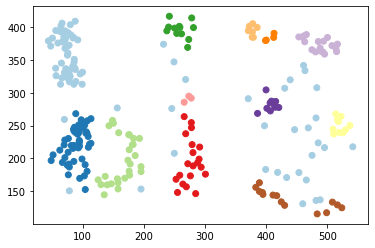

Clusterize with eps = 20


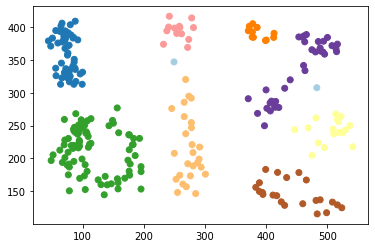

Clusterize with eps = 30


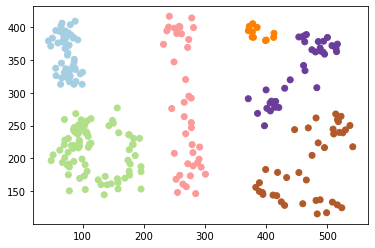

Clusterize with eps = 40


In [24]:
tested_eps = (5, 10, 15, 20 , 30, 40)

for eps in tested_eps:
  clusterize(eps)

# Эвристически выяснено, что наилучшее значение eps ≈ 35